###Importing necessay dependencies

In [61]:
# !pip install pycm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from pycm import ConfusionMatrix, Compare
import tensorflow as tf
METRIC_LIST = ["Accuracy", "F1", "Kappa", "Precision", "Recall"]

### Data Reading

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Address,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,0x000000000532b45f47779fce440748893b257865,1,7.973236e+07,11971.000000,3,20,0,20,3,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158,23,117.129473,117.132025,0.002551
1,0x00000000072d54638c2c2a3da3f715360269eea1,1,5.434648e+07,1281.695652,23,30,0,28,17,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806,53,215.965533,215.193910,-0.771623
2,0x0000000009324b6434d7766af41908e4c49ee1d7,1,1.771695e+08,4494.500000,6,9,0,9,3,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174,15,164.209043,164.214902,0.005859
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,1,3.213748e+08,0.000000,1,5,0,5,1,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305,6,60.502305,50.502914,-9.999391
4,0x00000000bf02300fd6251627aa3db8933a0eee83,1,7.971622e+07,12812.750000,4,20,0,17,2,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253,24,101.761014,81.766424,-19.994590


### Data Information, Explorations and visualizations

In [5]:
df.shape

(20302, 19)

In [6]:
df.columns

Index(['Address', 'Flag', 'Avg_min_between_received_tnx',
       'Avg_min_between_sent_tnx', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts',
       'Average_of_Unique_Received_From_Addresses',
       'Average_of_Unique_Sent_To_Addresses', 'min_value_received',
       'max_value_received ', 'avg_val_received', 'min_val_sent',
       'max_val_sent', 'avg_val_sent',
       'total_transactions_including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received', 'total_ether_balance'],
      dtype='object')

In [66]:
df.describe()

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
count,20302.000000,2.030200e+04,2.030200e+04,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,20302.000000,2.030200e+04,2.030200e+04,2.030200e+04
mean,0.279529,7.991606e+07,1.989844e+06,363.085804,481.494089,2.850901,179.440301,71.121121,28.569304,364.596330,63.640495,5.342059,233.705690,27.054139,847.430795,6.419082e+03,7.213792e+03,7.947074e+02
std,0.448779,1.835776e+08,3.116720e+07,1548.958945,1873.466283,127.920225,901.251215,514.709549,438.088823,9521.482573,2078.889936,211.492553,6418.530186,269.447271,2486.611759,2.569606e+05,2.571737e+05,1.745482e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07
25%,0.000000,8.200000e-01,0.000000e+00,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.269791,0.092155,0.000000,0.033407,0.005917,5.000000,5.400134e-02,8.000000e-01,0.000000e+00
50%,0.000000,7.127525e+03,2.250600e+02,4.000000,8.000000,0.000000,3.000000,2.000000,0.011211,2.000000,0.599991,0.000000,1.894453,0.360359,20.000000,5.468345e+00,9.551110e+00,1.722000e-03
75%,1.000000,4.684945e+07,2.988656e+04,39.000000,47.000000,0.000000,9.000000,9.000000,0.290558,16.817298,3.798540,0.270000,19.000000,4.202148,152.000000,7.525671e+01,9.231312e+01,5.332228e-02
max,1.000000,8.309932e+08,8.291299e+08,10000.000000,10000.000000,9995.000000,9999.000000,9950.000000,25533.614520,800000.000000,283618.831600,25533.614330,611102.014500,25533.614330,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07


0    14627
1     5675
Name: Flag, dtype: int64


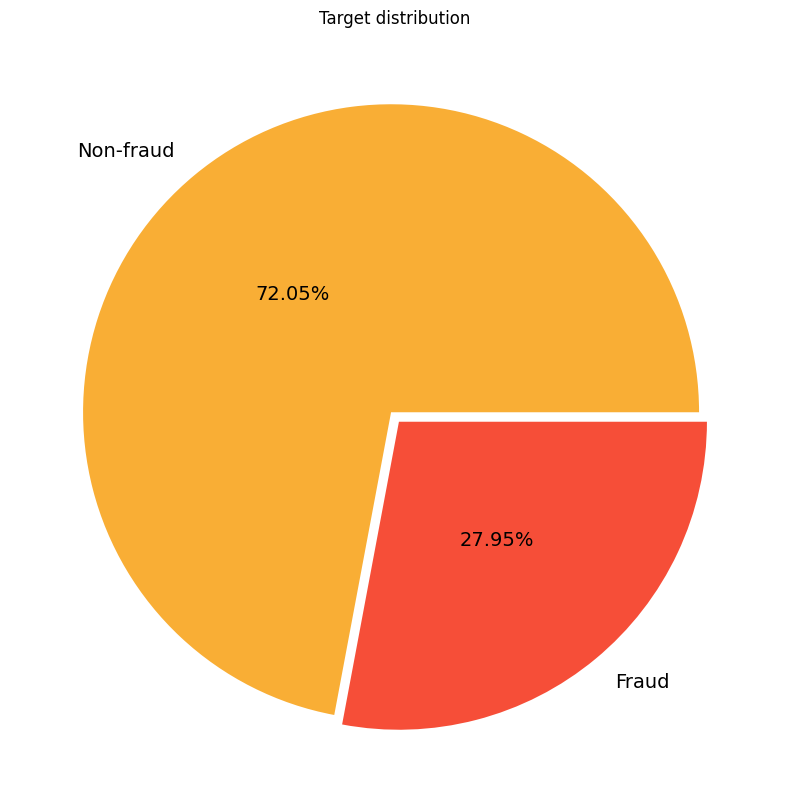

In [67]:
print(df["Flag"].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['Flag'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')

plt.show()

In [68]:
df.isna().sum()

Address                                                0
Flag                                                   0
Avg_min_between_received_tnx                           0
Avg_min_between_sent_tnx                               0
Sent_tnx                                               0
Received_Tnx                                           0
Number_of_Created_Contracts                            0
Average_of_Unique_Received_From_Addresses              0
Average_of_Unique_Sent_To_Addresses                    0
min_value_received                                     0
max_value_received                                     0
avg_val_received                                       0
min_val_sent                                           0
max_val_sent                                           0
avg_val_sent                                           0
total_transactions_including_tnx_to_create_contract    0
total_Ether_sent                                       0
total_ether_received           

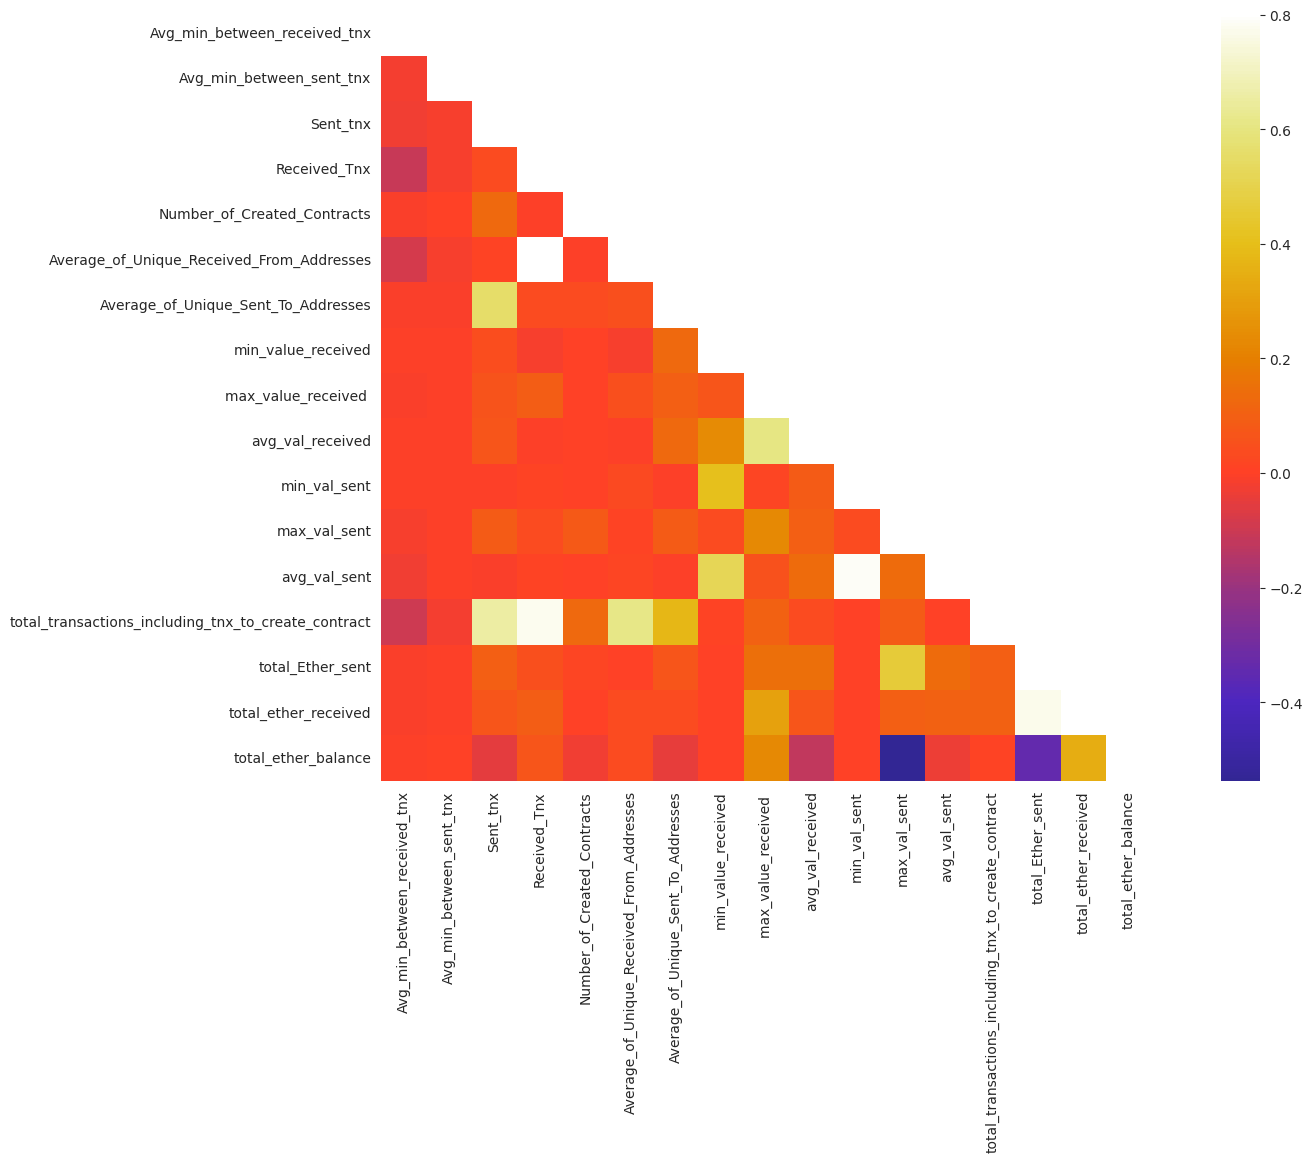

In [69]:
corr = df.iloc[:,2:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)


### Data Preparation

In [70]:
positive_sample = df[df["Flag"] == 1]
negative_sample = df[df["Flag"] == 0].sample(len(positive_sample), random_state = 23)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["Flag"]
X = data.iloc[:,2:]

## MLPC Neural Network

In [36]:
nn_params = {"hidden_layer_sizes": (100, 100), "solver": "adam"}

In [72]:
nn_model = MLPClassifier(**nn_params)
nn_model.fit(X, y)
kf = KFold(n_splits=10, random_state = 23, shuffle=True)
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    nn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = nn_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    nn_cm_list.append(cm)
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Name: Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.83

F1 : 0.84

Kappa : 0.67

Precision : 0.8

Recall : 0.9



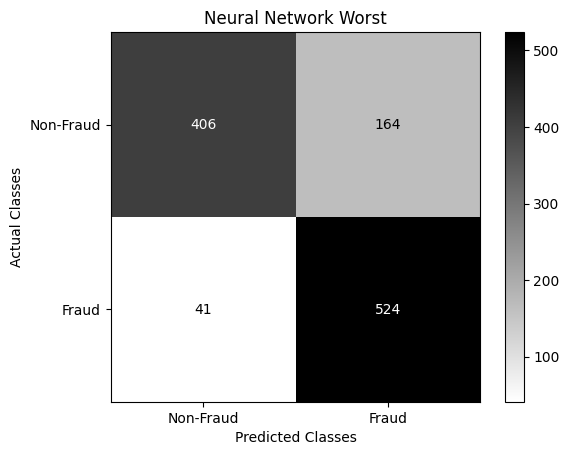

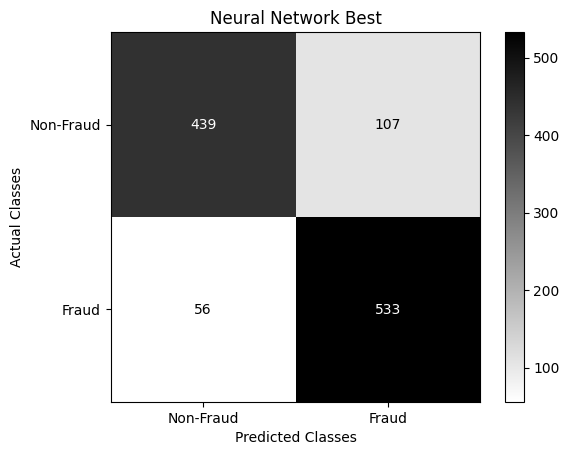

In [73]:
print("Model Name: Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()

In [74]:
df.var()

<ipython-input-74-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Flag                                                   2.014025e-01
Avg_min_between_received_tnx                           3.370072e+16
Avg_min_between_sent_tnx                               9.713941e+14
Sent_tnx                                               2.399274e+06
Received_Tnx                                           3.509876e+06
Number_of_Created_Contracts                            1.636358e+04
Average_of_Unique_Received_From_Addresses              8.122538e+05
Average_of_Unique_Sent_To_Addresses                    2.649259e+05
min_value_received                                     1.919218e+05
max_value_received                                     9.065863e+07
avg_val_received                                       4.321783e+06
min_val_sent                                           4.472910e+04
max_val_sent                                           4.119753e+07
avg_val_sent                                           7.260183e+04
total_transactions_including_tnx_to_create_contr

<ipython-input-75-c1cc744f8f52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


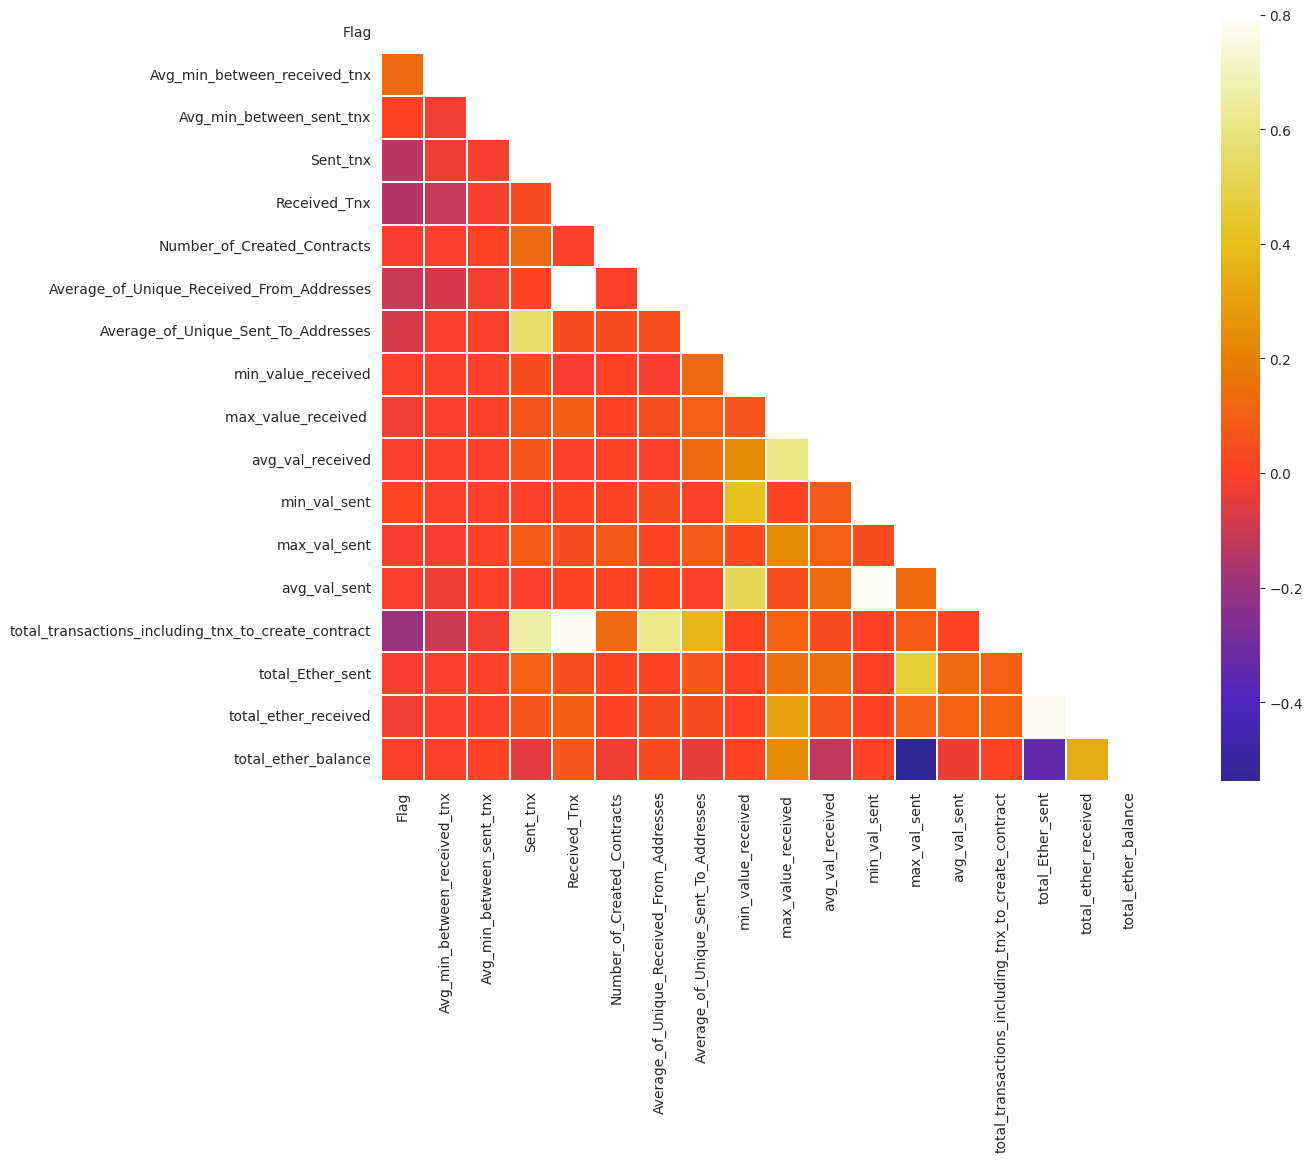

In [75]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [23]:
df2 = df.copy()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

In [25]:
df2.shape

(20302, 19)

In [26]:
df2.drop('Address', inplace=True, axis=1)
df2.head()

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,1,7.973236e+07,11971.000000,3,20,0,20,3,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158,23,117.129473,117.132025,0.002551
1,1,5.434648e+07,1281.695652,23,30,0,28,17,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806,53,215.965533,215.193910,-0.771623
2,1,1.771695e+08,4494.500000,6,9,0,9,3,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174,15,164.209043,164.214902,0.005859
3,1,3.213748e+08,0.000000,1,5,0,5,1,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305,6,60.502305,50.502914,-9.999391
4,1,7.971622e+07,12812.750000,4,20,0,17,2,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253,24,101.761014,81.766424,-19.994590


In [27]:
y = df2['Flag']
df2.drop(['Flag'], inplace=True, axis=1)
X = df2
print(X.shape, y.shape)

(20302, 17) (20302,)


In [28]:
(y==1).sum()

5675

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16241, 17) (16241,)
(4061, 17) (4061,)


### Handling the Imbalances

In [30]:
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [31]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,-1.315731,-0.476242,-0.285758,-1.183410,-0.405767,-1.028006,0.106614,2.247867,1.452266,1.774963,1.866459,1.408519,1.625215,-0.909551,1.047156,0.931966,-0.004717
1,0.986540,1.031856,1.623108,0.878315,-0.405767,1.149048,1.808518,-0.636907,1.271309,0.698596,-0.639620,1.252145,-0.394254,1.303880,1.334524,1.099118,-0.005411
2,-1.315731,-0.058113,-0.482737,-1.183410,-0.405767,-1.028006,-0.154209,2.247867,1.452266,1.774963,1.512661,1.434300,1.686299,-1.058437,1.047156,0.931966,-0.004717
3,-0.137661,0.950774,0.301932,-0.607833,-0.405767,-0.154255,0.765370,-0.443143,-0.693948,-0.644548,-0.639130,-0.721608,-0.811531,-0.293487,-0.764422,-0.955618,-0.004717
4,-1.315731,-1.190084,-0.786287,-1.183410,-0.405767,-1.028006,-0.575742,0.654846,-0.788649,-0.381417,0.982496,-0.701569,-0.277297,-1.259219,-0.888265,-1.081270,-0.004717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,-0.095822,0.625613,1.012197,0.837597,-0.405767,-1.028006,1.394608,1.203008,1.590385,1.583266,-0.639620,1.659275,1.609414,0.666846,1.684175,1.624756,-0.006982
16237,1.109770,1.150857,0.678472,0.504403,-0.405767,-1.028006,-0.154209,0.650998,-0.665521,-0.369932,0.976895,-0.586958,-0.266812,0.320081,0.314123,0.137989,-0.004716
16238,0.467829,0.261072,1.906497,1.817795,-0.405767,2.108487,2.147295,-0.614958,1.732929,0.800858,-0.639620,1.788244,0.311750,1.831830,1.911315,1.967498,-0.004025
16239,1.317448,1.264067,1.153104,-0.315296,-0.405767,-0.154255,1.435790,-0.514962,-1.106414,-0.951850,-0.639620,-0.866221,-0.875931,0.624926,-0.139014,-1.152423,-0.004736


In [32]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((16241, 17), (16241,))
Shape of the training after SMOTE: ((23340, 17), (23340,))


In [34]:
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \trFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 11670 
 	Fauds: 4571
AFTER OVERSAMPLING 
 	Non-frauds: 11670 
 	rFauds: 11671


## MLPC Neural Network model

In [37]:
nn_params = {"hidden_layer_sizes": (100, 100), "solver": "adam"}

In [38]:
# x_tr_resample, y_tr_resample
nn_model = MLPClassifier(**nn_params)
nn_model.fit(X, y)
kf = KFold(n_splits=10, random_state = 23, shuffle=True)
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []
for train_index, test_index in kf.split(X):
    # X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # scaler = StandardScaler().fit(X_train)
    # X_train = scaler.transform(X_train)
    # X_test =  scaler.transform(X_test)
    t_df = norm.fit_transform(X_test)
    nn_model.fit(norm_df, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = nn_model.predict(t_df))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    nn_cm_list.append(cm)
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_mul

Model Name: Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.9

F1 : 0.81

Kappa : 0.74

Precision : 0.86

Recall : 0.76



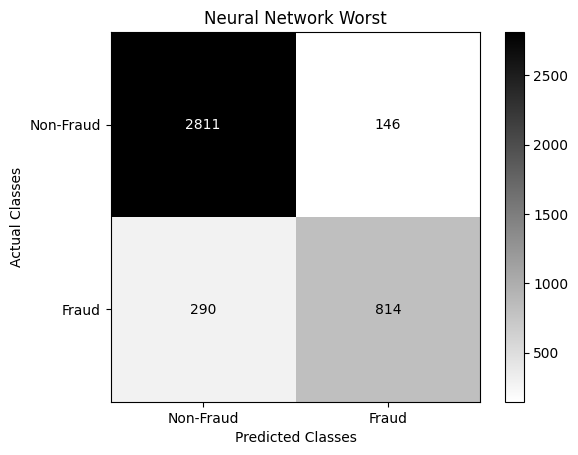

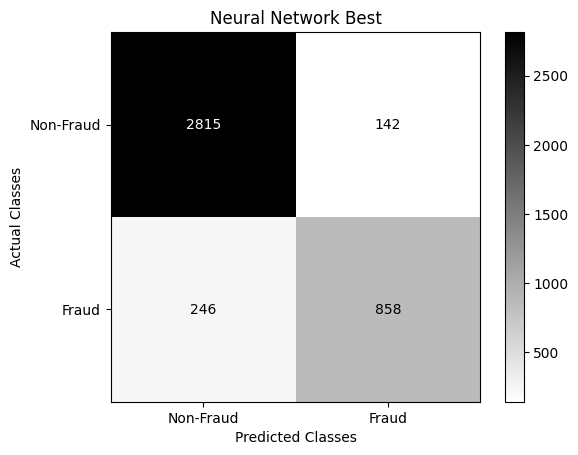

In [39]:
print("Model Name: Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()